This is a simple movie recommendation system build with python, scikit-learn library.
We will be using the movielens dataset in our model, to download the dataset
visit :

*  movies_csv :  https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv
*  ratings_csv : https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv

Overview:
   

*   Importing necessary libraries
*   Loading the Dataset
*   Data preprocessing & Analysis
*   Building the Collaborative Recommendation System


**Step 1:**

Load the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**Step 2:**

Load the Dataset

In [5]:
movies_csv = pd.read_csv("movies.csv")
ratings_csv = pd.read_csv("ratings.csv")

**Step 3:**

Data Preprocessing & Analysis


In [7]:
movies_csv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies_csv.shape

(9125, 3)

In [9]:
ratings_csv.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
ratings_csv.shape

(100004, 4)

First lets explore how many unique users are there in our dataset

In [11]:
unique_users = ratings_csv['userId'].nunique()
unique_users

671

Well, there are 671 total users who have rated different movies . Now, lets explore how many different movies are there in our dataset?

In [14]:
unique_movies = ratings_csv['movieId'].nunique()
unique_movies

9066

From this we can clearly see that there are around 9066 unique movies in the dataset . Now, lets find out the average rating for the movies.

In [15]:
ratings_csv['rating'].mean()

3.543608255669773

The average rating for a movie is 3.54. Similarly lets, find out the average no of user rated movies.

In [16]:
ratings_csv['rating'].shape[0]/ratings_csv['movieId'].nunique()

11.030664019413193

On average a user rate approximately rates 11 movies.

What all can we infer from the data ....
Lets find out the most user rated movies(no of users not the rating) and least rated movies

In [17]:
most_rated_movie_= ratings_csv.groupby('movieId')['rating'].agg('count').reset_index()
most_rated_movie_.rename(columns={'rating':'count'},inplace=True)
most_rated_movie_.sort_values(by='count',ascending=False).head(5)

,movieId,count
321,356,341
266,296,324
284,318,311
525,593,304
232,260,291


We can clearly infer that movie id 356 ,296 ,318 has the highest no of user-rating. Now lets find what are the movie names


In [18]:
merged_df = ratings_csv.merge(movies_csv,on='movieId')
merged_df.groupby('title')['rating'].agg('count').sort_values(ascending=False).reset_index().iloc[:5]

,title,rating
0,Forrest Gump (1994),341
1,Pulp Fiction (1994),324
2,"Shawshank Redemption, The (1994)",311
3,"Silence of the Lambs, The (1991)",304
4,Star Wars: Episode IV - A New Hope (1977),291


The top 5 user-rated movies (no of ratings) are


1.   Forrest Gump (1994)
2.   Pulp Fiction (1994)
3.   Shawshank Redemption, The (1994)
4.   Silence of the Lambs, The (1991)
5.   Star Wars: Episode IV - A New Hope (1977)

Lets find the least rated movie

In [19]:
merged_df.groupby('title')['rating'].agg('count').sort_values(ascending=True).reset_index().iloc[:5]

,title,rating
0,İtirazım Var (2014),1
1,Dragonslayer (1981),1
2,Drained (O cheiro do Ralo) (2006),1
3,Dream Home (Wai dor lei ah yut ho) (2010),1
4,Once a Thief (Zong heng si hai) (1991),1


Finally, we will find out the movie with highest average rating / highest rated

In [20]:
merged_df.groupby('title')['rating'].agg('mean').sort_values(ascending=False).iloc[:10]

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Name: rating, dtype: float64

In [21]:
print("The total no of users voted for Ivan Vasilievich: Back to the Future is",merged_df[merged_df['title']=='Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)'].shape[0])
print("The rating of the Forest Gump movie",merged_df[merged_df['title']=='Forrest Gump (1994)']['rating'].mean())
print("The total no of users voted for Forest Gump movie is",merged_df[merged_df['title']=='Forrest Gump (1994)'].shape[0])



The total no of users voted for Ivan Vasilievich: Back to the Future is 1
The rating of the Forest Gump movie 4.05425219941349
The total no of users voted for Forest Gump movie is 341


Now here is the problem we can clearly see that Ivan Vasilievich: Back to the Future is the highly rated movie , but only 1 user has rated the movie .
On the other hand if you look at Forest Gump , 341 users have rated this movie . Clearly, the rating is affected by the no of users who have rated the movie . We have to find a solution so that we could avoid bias in calculating the average rating of the movie, which we will cover in the next module.


---


**Most liked genre**

To do this lets import python library collections

In [22]:
from collections import Counter
genre_df = pd.DataFrame(data = merged_df['genres'].apply(lambda x:x.split('|')),columns = ['genres'])
genres_frequency = Counter((g for i in genre_df['genres'] for g in i))
genres_frequency
genres_frequency.values()

dict_values([44752, 6170, 8680, 4722, 25240, 27056, 22017, 15365, 5025, 10657, 6790, 19336, 38026, 16266, 1912, 7625, 3156, 1564, 1140, 18])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Musical'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'War'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Comedy'),
  Text(13, 0, 'Crime'),
  Text(14, 0, 'Western'),
  Text(15, 0, 'Mystery'),
  Text(16, 0, 'IMAX'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

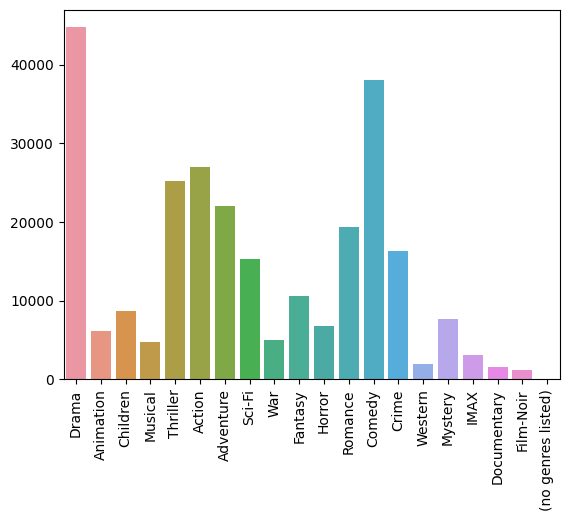

In [23]:
sn.barplot(x = [i for i in genres_frequency.keys()], y=[i for i in genres_frequency.values()])
plt.xticks(rotation=90)

Genre --> Drama is the most rated genre
next comes comedy, thriller and romance

**Most user Rated movie**

<Axes: xlabel='title', ylabel='rating'>

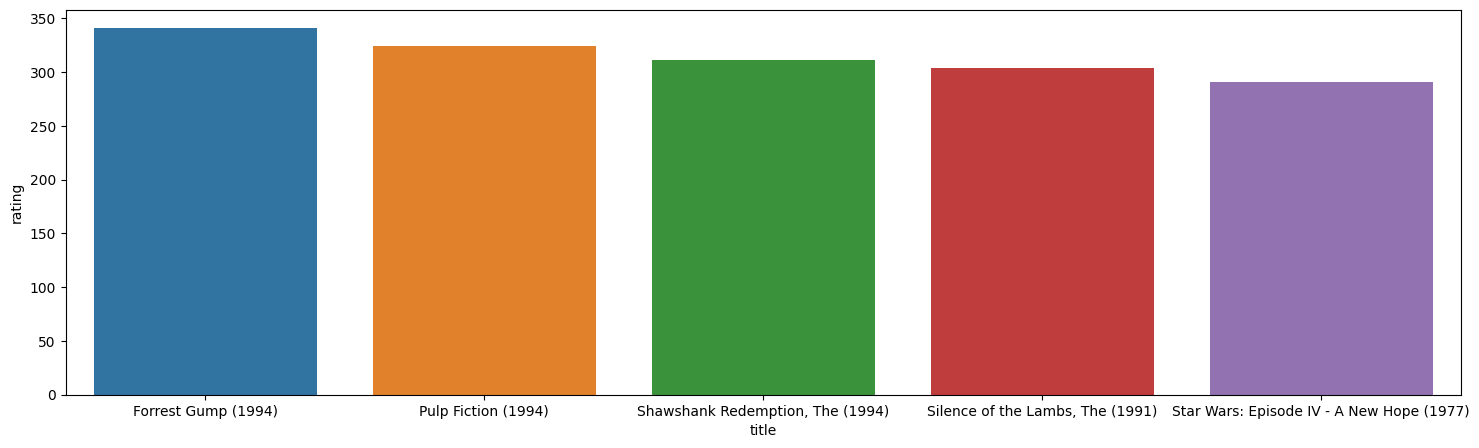

In [24]:
most_user_rated = merged_df.groupby('title')['rating'].agg('count').reset_index().sort_values(by='rating',ascending=False).iloc[:5]
plt.figure(figsize=(18,5))
sn.barplot(x=most_user_rated['title'],y=most_user_rated['rating'])

**Least user Rated movie**

<Axes: xlabel='title', ylabel='rating'>

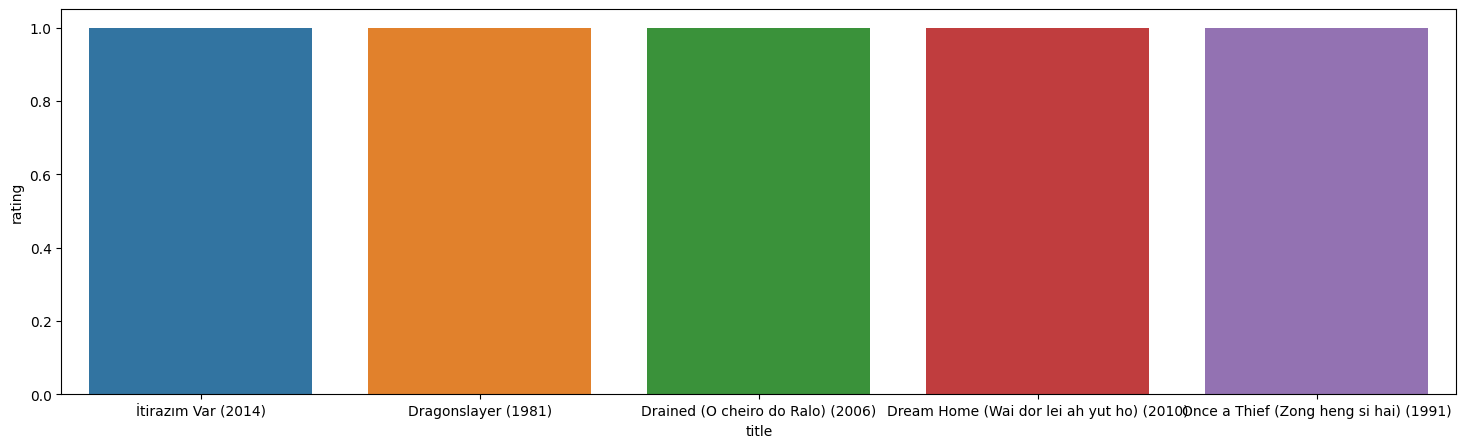

In [25]:
least_user_rated = merged_df.groupby('title')['rating'].agg('count').reset_index().sort_values(by='rating').iloc[:5]
plt.figure(figsize=(18,5))
sn.barplot(x=least_user_rated['title'],y=least_user_rated['rating'])

**Highest rated movie**

<Axes: xlabel='title', ylabel='rating'>

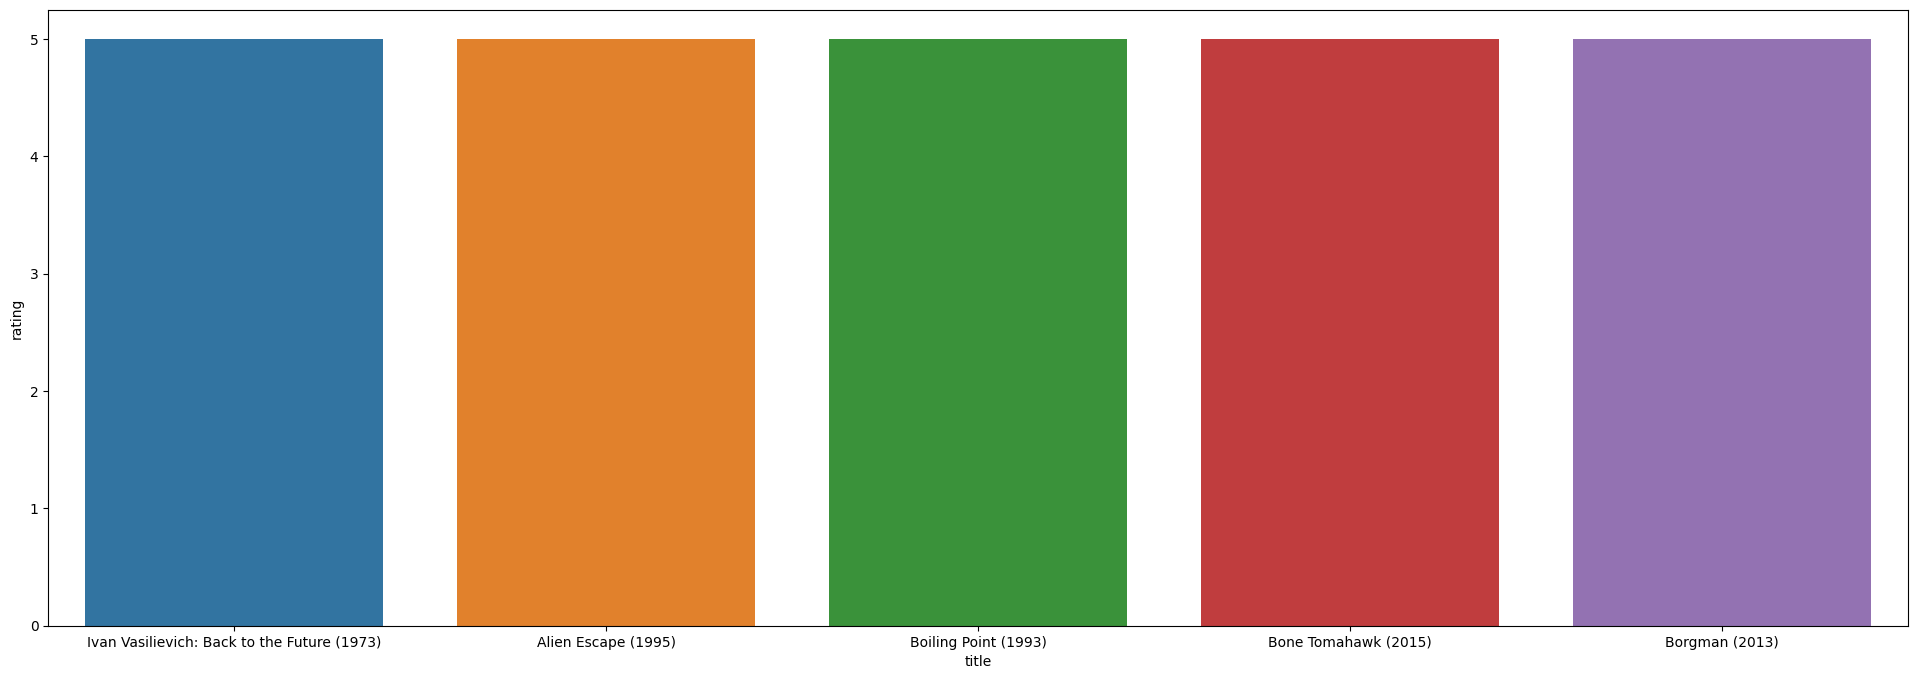

In [26]:
merged_df['title'].replace({'Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)':'Ivan Vasilievich: Back to the Future (1973)'},inplace=True)
highest_rated = merged_df.groupby('title')['rating'].agg('mean').reset_index().sort_values(by='rating',ascending=False).iloc[:5]
plt.figure(figsize=(24,8))
sn.barplot(x=highest_rated['title'],y=highest_rated['rating'])

**Least rated movie**

<Axes: xlabel='title', ylabel='rating'>

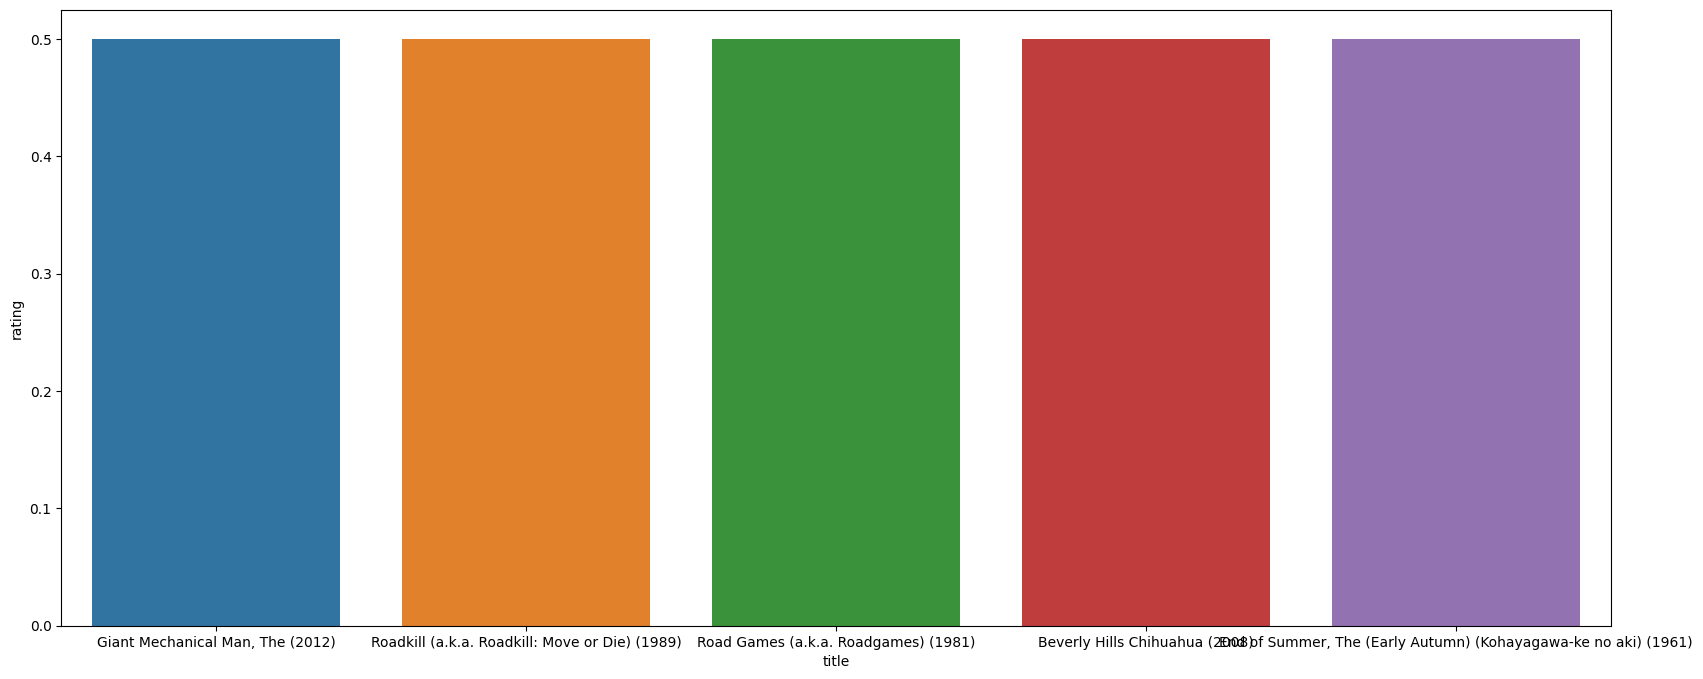

In [27]:
least_rated = merged_df.groupby('title')['rating'].agg('mean').reset_index().sort_values(by='rating').iloc[:5]
plt.figure(figsize=(20,8))
sn.barplot(x=least_rated['title'],y=least_rated['rating'])

**Data Preprocessing**


Before building our model we have seen the bias in rating in accordance to no of rating for a movie . To avoid this bias we can use help of the

Bayesian average

Bayesian Average
Bayesian Average is defined as:

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

where
 C represents our confidence,
 M represents our prior, and
 N is the total number of reviews for movie
.

 C represents "the typical data set size". In this case,
 C will be the average number of ratings for a given movie.
 M represents the average rating across all movies

In [28]:
#Average no of rating for a given movie
C = (ratings_csv['rating'].shape[0])/(ratings_csv['movieId'].nunique())
C

11.030664019413193

In [29]:
#Average rating for a movie
M = ratings_csv['rating'].mean()
M

3.543608255669773

In [30]:
def bayesian_fun2(movie):
  return round((C*M + movie.sum()) / (C + movie.count()),2)


bayesian_df = ratings_csv.groupby('movieId')['rating'].agg(bayesian_fun2).reset_index()

In [31]:
bayesian_df.columns = ['movieId','bayesian_rating']
merged_df = merged_df.merge(bayesian_df,on='movieId')


In [ ]:
# def title_year(string):
#   integers ='0123456789'
#   string = string.replace(" ",'')
#   index = 0
#   for i in range(len(string)-1):
#     if string[i+1] in integers and string[i]=='(':
#       index = i
#   return string[:index],string[index+1:len(string)-1]

# movies_csv[['movie','year']] = movies_csv['title'].apply(lambda x : pd.Series(title_year(x)))

**We will use bayesian_avg for the recommendation system so we will drop the ratings column**

In [32]:
merged_df = merged_df.drop('rating',axis=1)
merged_df

,userId,movieId,timestamp,title,genres,bayesian_rating
0,1,31,1260759144,Dangerous Minds (1995),Drama,3.25
1,7,31,851868750,Dangerous Minds (1995),Drama,3.25
2,31,31,1273541953,Dangerous Minds (1995),Drama,3.25
3,32,31,834828440,Dangerous Minds (1995),Drama,3.25
4,36,31,847057202,Dangerous Minds (1995),Drama,3.25
...,...,...,...,...,...,...
99999,664,64997,1343761859,War of the Worlds (2005),Action|Sci-Fi,3.46
100000,664,72380,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller,3.54
100001,665,129,995232528,Pie in the Sky (1996),Comedy|Romance,3.50
100002,665,4736,1010197684,Summer Catch (2001),Comedy|Drama|Romance,3.33


**Building the User-Item Matrix**

 The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require explicit information about the users or the movies to generate recommendations.

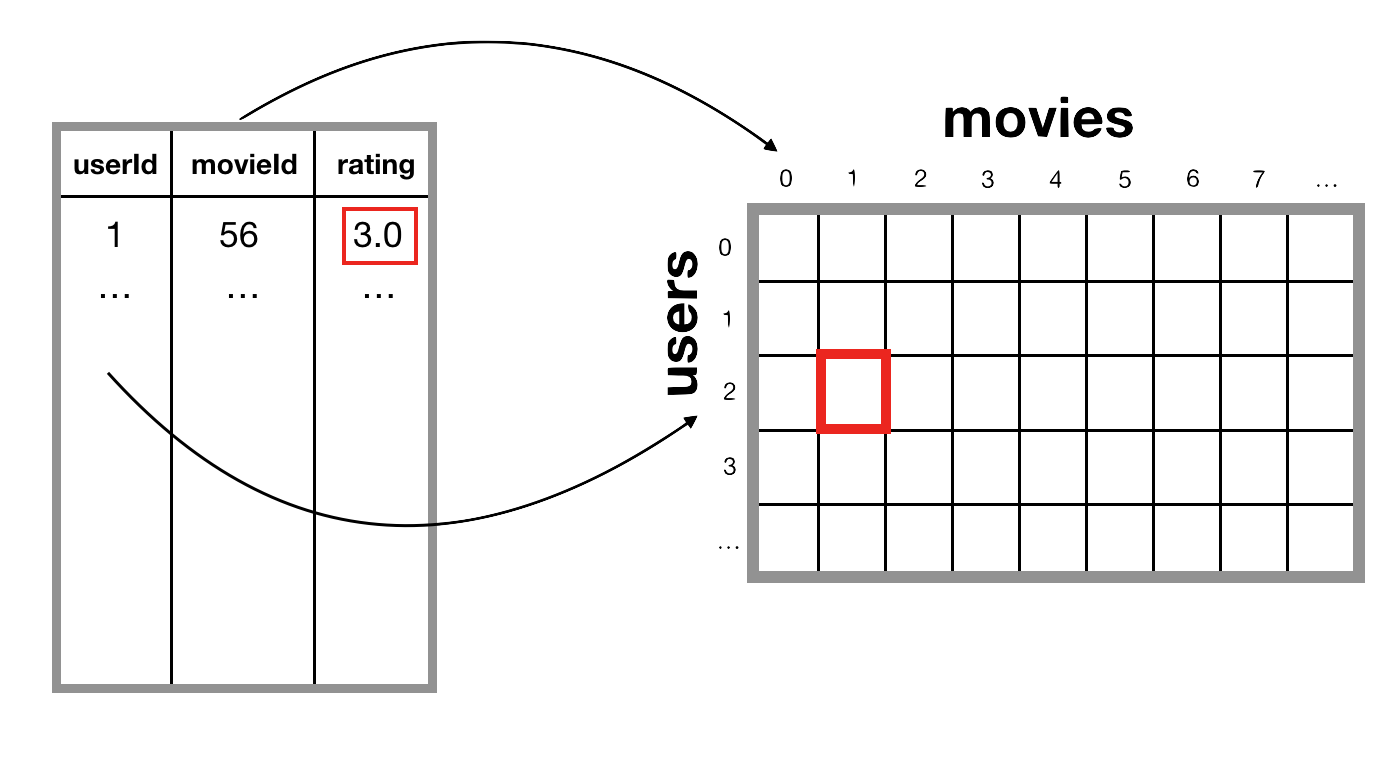




The mapper_fun() function outputs a sparse matrix
 with four mapper dictionaries:

user_mapper: maps user id to user index

movie_mapper: maps movie id to movie index

user_inv_mapper: maps user index to user id

movie_inv_mapper: maps movie index to movie id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/movie id.

In [33]:
from scipy.sparse import csr_matrix
def mapper_fun(df):
  user_mapper = dict(zip(np.unique(ratings_csv['userId']),range(unique_users)))
  movie_mapper = dict(zip(np.unique(ratings_csv['movieId']),range(unique_movies)))
  user_inv_mapper = dict(zip(range(unique_users),np.unique(ratings_csv['userId'])))
  movie_inv_mapper = dict(zip(range(unique_movies),np.unique(ratings_csv['movieId'])))
  user_index= [user_mapper[i] for i in df['userId']]
  movie_index = [movie_mapper[i] for i in df['movieId']]
  X = csr_matrix((df['rating'],(user_index,movie_index)),shape=(unique_users,unique_movies))
  return X,user_mapper,movie_mapper,user_inv_mapper,movie_inv_mapper


X,user_mapper,movie_mapper,user_inv_mapper,movie_inv_mapper = mapper_fun(ratings_csv)

**Recommendation System using KNN**

In [34]:
from sklearn.neighbors import NearestNeighbors
def collaborative_filtering(movie):
  movie_id = movie_title_id_mapper[movie]
  global X
  l=[]
  X =X.T
  movie_map = movie_mapper[movie_id] #movie_id --> movie_index
  movie_vec = X[movie_map] #vector from the movie_id index
  # if isinstance(movie_vec,(np.ndarray)):
  #   movie_vec = movie_vec.reshape(1,-1)
  Knn = NearestNeighbors(n_neighbors=11,metric='cosine',algorithm='brute')
  Knn.fit(X)
  neighbors = Knn.kneighbors(movie_vec,return_distance = False)
  for i in range(1,11):
    n = neighbors.item(i)
    print(f'The recommended movies are {movie_id_title_mapper[movie_inv_mapper[n]]}')
    # l.append(movie_inv_mapper[n]) # Return index to movie
  X=X.T






Movie Id title mapper

Maps the movie id with title

In [40]:
ratings_csv['movieId'].nunique()
movie_id_title_mapper = dict(zip(movies_csv['movieId'],movies_csv['title']))

Remembering movie id and year might be tough .

To solve this,

We are going to use python's fuzzywuzzy module to find out the matching title
and the movie_title to movie_id mapper which is used to find out the corresponding movie_id

In [39]:
!pip install fuzzywuzzy
movie_id_title_mapper = dict(zip(movies_csv['movieId'],movies_csv['title']))
movie_title_id_mapper = dict(zip(movies_csv['title'],movies_csv['movieId']))
from fuzzywuzzy import process

def movie_finder(title):
  all_titles = movies_csv['title']
  closest_match = process.extractOne(title,all_titles)
  print("Your watched movie",closest_match[0])
  return collaborative_filtering(closest_match[0])

movie_finder('Dangerous Minds')

Your watched movie Dangerous Minds (1995)
The recommended movies are Under Siege 2: Dark Territory (1995)
The recommended movies are Net, The (1995)
The recommended movies are Die Hard: With a Vengeance (1995)
The recommended movies are Showgirls (1995)
The recommended movies are Now and Then (1995)
The recommended movies are Client, The (1994)
The recommended movies are Copycat (1995)
The recommended movies are Philadelphia (1993)
The recommended movies are Drop Zone (1994)
The recommended movies are Murder in the First (1995)


**Importing our model**

In [ ]:
import pickle
with open('movie_recommender.pickle','wb') as f:
  pickle.dump(collaborative_filtering,f)

I hope you found this tutorial useful!!!